<a href="https://colab.research.google.com/github/aruanalucena/Projeto_Ecommerce_/blob/main/Ecommerce_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/mbdq8P5.png)

# <font color='arrows'>**Quem sou eu na fila do pão!**
>Meu nome é **Aruanã Cortez**, sou Cientista de Dados. Sempre tive gosto pela área de tecnologia, tem 2 anos  comecei a aprender sobre programação, ciência de dados e etc.
* Procuro colocação em startups e companhias no exterior, principalmente na Alemanha e Holanda. Paixão por desafios e Machine Learning , IA e IoT são áreas que tenho muito interesse e me desenvolver e projetos.Tenho conhecimento de Métodos Ageis , versionamento e  trabalho remoto.

### <font color='arrows'>**Onde encontrar meu trabalho?**
1. [Site](https://www.aruanacortezdev.com.br);
2. [Github](https://https://github.com/aruanalucena) .

# <font color='arrows'>**Sobre o que é meu projeto?**</font>

Neste trabalho iremos analisar a base de dados disponibilizada _**online pela Olist**_.

***

Esta base refere-se ao desenvolvimento do comércio eletrônico no Brasil nos últimos anos, apresentando informações tanto das compras realizadas, quanto dos clientes que as fizeram, dos vendedores envolvidos e dos produtos comercializado neste tempo.



***
**Alvos de estudo**:
1. <font color='green'>**NLP|Processamento Linguagem Natural**</font> Desenvolver analise dos textos de avaliação e suas diversas dimensões.<br>
2. <font color='green'>**CLUSTERING|AGRUPAMENTO**</font> Agrupar exemplo clientes que não escreveram um comentario.Porquê? satisfeito ou  o que ?<br>
3. <font color='green'>**SALES PREDICTION|PREVER VENDAS**</font> Com dados da data de compra prever vendas futuras.<br>
4. <font color='green'>**PRODUCT QUALITY|QUALIDADE DO PRODUTO**</font> Categorias que causam mais insatisfação do Cliente.<br>
5. <font color='green'>**FEATURE ENGINEERING|ENGENHARIA DE RECURSOS**</font>Anexar informações publicas a ele ou criar recusrsos a partir dos dados.<br>
***

**Objetivos**:
Meu  objetivo é explorar esta base de dados para tirar informações relevantes para serem utilizadas nos negócios, culminando com uma segmentação dos clientes, onde estes possam ser classificados de acordo com sua assiduidade às compras online.


* **OBS :** Vou procurar aplicar todas as técnicas que recebi no Curso dos instrutores, mentores e equipe da AWARI

# Guia para o notebook:
<font color='Orange'> >> </font> Textos precedidos de sinais na cor <font color='Orange'> Laranja </font> são **comentários gerais** feitos por mim. <br>
<font color='Red'> >> </font> Textos precedidos de sinais na cor <font color='Red'> Vermelha </font> são questionamentos que **tentarei responder**. <br>
<font color='Blue'> >> </font> Textos precedidos de sinais na cor <font color='Blue'> Azul </font> são **respostas e hipóteses levantadas por mim** para responder aos questionamentos anteriores.<br>
<font color='Green'> >> </font> Textos precedidos de sinais na cor <font color='Green'> Verde </font> Demonstro  **conceitos**.

![Imgur](https://i.imgur.com/WrvNxSC.jpg)

## <font color='orange'>>></font> Análise Temporal

Nesta etapa do trabalho estaremos focados em estudar sobre a sazonalidade e as tendências das compras online e para isso faremos uma análise utilizando as séries temporais correspondentes. Como produto final iremos criar um modelo preditivo, ou seja, fazer um **forecast** para estipular as vendas em instantes futuros.

Assim, nosso primeiro passo é importar as bibliotecas a serem utilizadas e carregar os dados que precisaremos para tal análise.

### <font color='orange'>>></font>1) Importar e carregar os dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from datetime import datetime, date

In [4]:
!git clone https://github.com/Mario-RJunior/olist-e-commerce

Cloning into 'olist-e-commerce'...
remote: Enumerating objects: 896, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 896 (delta 15), reused 0 (delta 0), pack-reused 865
Receiving objects: 100% (896/896), 79.73 MiB | 27.95 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [5]:
# Escolher as colunas para uso
orders_col = ['order_id', 'order_status', 'order_purchase_timestamp', 
              'order_approved_at', 'order_delivered_carrier_date', 
              'order_delivered_customer_date', 'order_estimated_delivery_date']
orders_items_col = ['order_id', 'shipping_limit_date', 'price']

In [6]:
# Chamar os datasets
orders = pd.read_csv('olist-e-commerce/datasets/olist_orders_dataset.csv', 
                     usecols=orders_col)
orders_items = pd.read_csv('olist-e-commerce/datasets/olist_order_items_dataset.csv', 
                           usecols=orders_items_col)

In [7]:
# União dos dataframes
df = pd.merge(right=orders_items,
             left=orders,
             on='order_id')

In [8]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45:59,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31:37,19.90


### <font color='orange'>>></font>2) Forma dos dados

In [9]:
df.shape

(112650, 9)

* Tipos ds variáveis.

In [10]:
# Tipo das variaveis
df.dtypes

order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
shipping_limit_date               object
price                            float64
dtype: object

* Agora, como desejamos trabalhar com séries temporais devemos então converter as respectivas colunas para o formato *datetime*, uma vez que elas estão originalmente no formato *object*.

In [11]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

* Uma vez convertidas para datetime iremos fazer mais um tratamento, sobretudo na coluna "order_purchase_timestamp". Como queremos analisar o comportamento das compras diárias tais como tendência e sazonalidade, iremos remover a hora de cada registro e considerar apenas as datas em que as compras ocorreram.

In [12]:
# Pegando apenas a data da coluna "order_purchase_timestamp"
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(lambda x: x.date())

# Convertendo novamente a data diária para formato datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(lambda x: datetime(x.year, x.month, x.day))

In [13]:
# Confirmando os tipos de dados
df.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date              datetime64[ns]
price                                   float64
dtype: object

In [14]:
# check valores faltantes
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
shipping_limit_date                 0
price                               0
dtype: int64

### <font color = 'orange'>>>3) Explorar e tratar a base de dados</font>

In [15]:
# Verificando as datas da primeira e da última compra
print('Data mínima: {} \nData máxima: {}'.format(df['order_purchase_timestamp'].min(), 
                                                 df['order_purchase_timestamp'].max()))

Data mínima: 2016-09-04 00:00:00 
Data máxima: 2018-09-03 00:00:00


In [16]:
df.groupby([df['order_purchase_timestamp'].dt.year,
           df['order_purchase_timestamp'].dt.month]).count()['order_id']

order_purchase_timestamp  order_purchase_timestamp
2016                      9                              6
                          10                           363
                          12                             1
2017                      1                            955
                          2                           1951
                          3                           3000
                          4                           2684
                          5                           4136
                          6                           3583
                          7                           4519
                          8                           4910
                          9                           4831
                          10                          5322
                          11                          8665
                          12                          6308
2018                      1                           8208
     

Note que no ano de 2016 temos alguns valores que não apresentam-se coerentes com o restante dos meses. Portanto iremos desconsiderar tais valores e criar o modelo utilizando todo o ano de 2017 e os nove meses de 2018.

Note ainda que do resultado acima é possível perceber que os dados referentes a 2016 somam 370 registros. Logo, iremos ordernar estas datas, criar uma lista com os índices de todos os 370 registros e deletar tais linhas.

In [17]:
# Criando uma lista com os índices
ano_2016_index = df['order_purchase_timestamp'].sort_values().index[:370]
ano_2016_index

Int64Index([  5085,   5086,   4925,  34804,  34802,  34803,  93991, 110955,
            100101,  70259,
            ...
             77891,  28766,  92287, 103736,  59722,  59721,  59723,  35343,
             90652,  45006],
           dtype='int64', length=370)

In [18]:
# Excluindo estas linhas
df.drop(index=ano_2016_index, inplace=True)

In [19]:
# Fazendo uma nova verificação
df.groupby([df['order_purchase_timestamp'].dt.year,
           df['order_purchase_timestamp'].dt.month]).count()['order_id']

order_purchase_timestamp  order_purchase_timestamp
2017                      1                            955
                          2                           1951
                          3                           3000
                          4                           2684
                          5                           4136
                          6                           3583
                          7                           4519
                          8                           4910
                          9                           4831
                          10                          5322
                          11                          8665
                          12                          6308
2018                      1                           8208
                          2                           7672
                          3                           8217
                          4                           7975
     

### <font color='orange'>>> 4) Plotar comportamento das séries temporais</font>

Agora, iremos definir duas bases de dados:

1) Considerando a quantidade de produtos que foram vendidos por mês.

2) Considerando o valor obtido por mês.

A seguir, iremos fazer um gráfico para cada situação para entender o comportamento das séries em ambos os casos.

- Plotando os dados para a quantidade de produtos vendidos mensalmente

In [20]:
df_group_quant = df.groupby(df['order_purchase_timestamp']).count()['order_id']
df_group_quant

order_purchase_timestamp
2017-01-05    32
2017-01-06     4
2017-01-07     5
2017-01-08     6
2017-01-09     6
              ..
2018-08-26    82
2018-08-27    71
2018-08-28    45
2018-08-29    16
2018-09-03     1
Name: order_id, Length: 603, dtype: int64

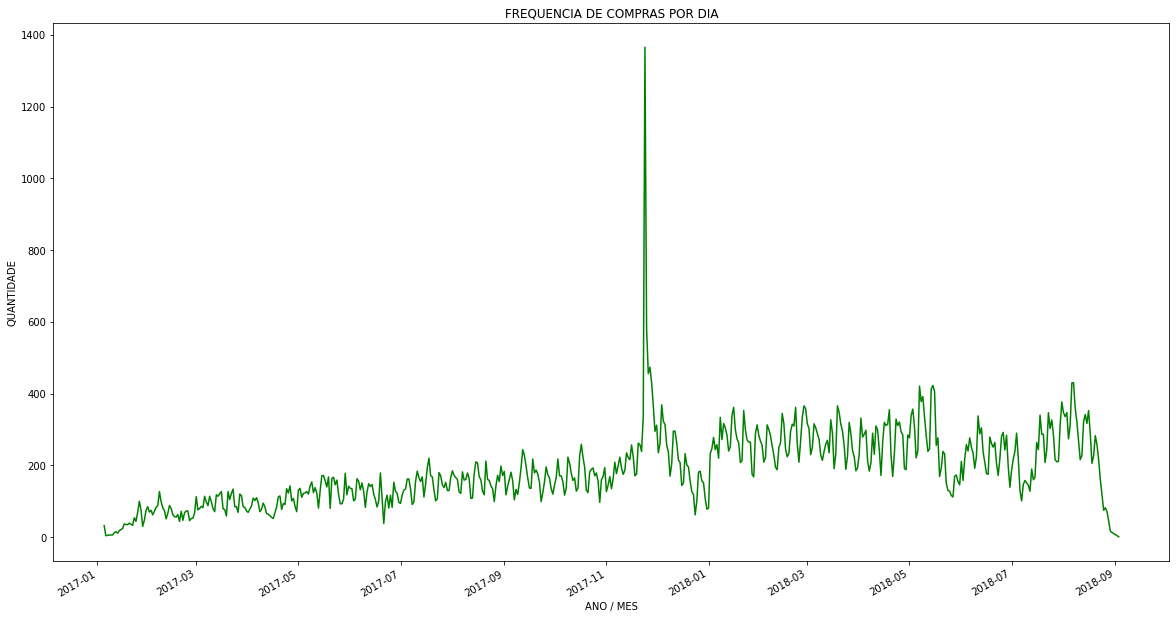

In [21]:
df_group_quant.plot(figsize=(20,11),color='g')
plt.title('FREQUENCIA DE COMPRAS POR DIA')
plt.xlabel('ANO / MES')
plt.ylabel('QUANTIDADE')
plt.show()

- Plotando os dados para o total de dinheiro arrecadado pelas vendas mensalmente

In [22]:
df_group_price = df.groupby(df['order_purchase_timestamp']).sum()['price']
df_group_price

order_purchase_timestamp
2017-01-05     396.90
2017-01-06     916.38
2017-01-07    1351.90
2017-01-08     709.58
2017-01-09     673.79
               ...   
2018-08-26    8070.71
2018-08-27    5345.91
2018-08-28    3673.91
2018-08-29    1546.04
2018-09-03     145.00
Name: price, Length: 603, dtype: float64

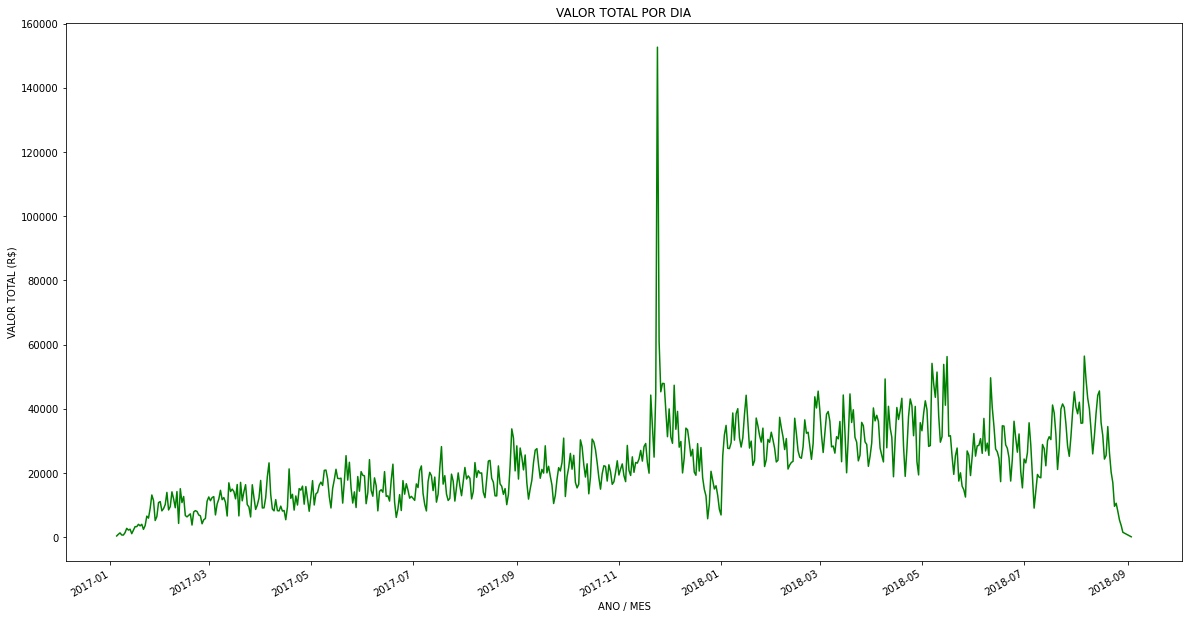

In [23]:
df_group_price.plot(figsize=(20,11),color='g')
plt.title('VALOR TOTAL POR DIA')
plt.xlabel('ANO / MES')
plt.ylabel('VALOR TOTAL (R$)')
plt.show()

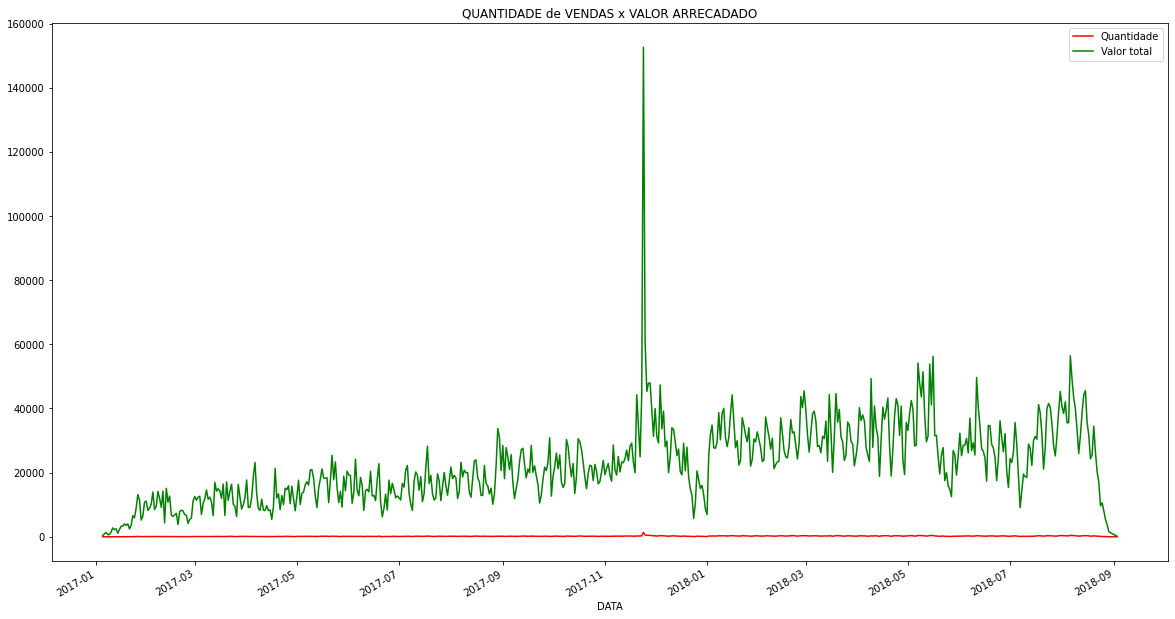

In [24]:
# Plotando ambos os gráficos juntos
df_group_quant.plot(figsize=(20,11), label='Quantidade',color='r')
df_group_price.plot(figsize=(20,11), label='Valor total',color='g')
plt.title('QUANTIDADE de VENDAS x VALOR ARRECADADO')
plt.xlabel('DATA')
plt.legend(loc='best')
plt.show()

Note que apesar de ambos os gráficos serem muito semelhantes eles apresentam-se em escalas bem diferentes o que faz com que o gráfico da quantidade fique praticamente uma linha reta em relação ao dos preços.

- Criação do modelo usando o Prophet

Nesta etapa iremos utilizar a biblioteca fbprophet para gerar um modelo com o intuito de encontrar sazonalidade, tendência e fazer algumas previsões para compras nos meses futuros.

A seguir, precisaremos criar um dataframe apropriado para utilização do Prophet em ambos os casos.

In [25]:
# Criação do modelo
model_quant = Prophet(yearly_seasonality=True)
model_preco = Prophet(yearly_seasonality=True)

In [26]:
# Adicionando sazonalidade mensal
model_quant.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_preco.add_seasonality(name='monthly', period=30.5, fourier_order=5)


- Criando os respectivos dataframes

1) Considerando a quantidade de vendas

In [27]:
# Criação do dataframe das quantidades
ts_quant = df.groupby('order_purchase_timestamp').count()['order_id'].reset_index()
ts_quant.rename(columns= {
    'order_purchase_timestamp': 'ds',
    'order_id': 'y'
    }, inplace=True)
ts_quant.head()

,ds,y
0,2017-01-05,32
1,2017-01-06,4
2,2017-01-07,5
3,2017-01-08,6
4,2017-01-09,6


2) Considerando o preço total das vendas

In [28]:
# Criando o dataframe do valor total das vendas
ts_preco = df.groupby('order_purchase_timestamp').sum()['price'].reset_index()
ts_preco.rename(columns= {
    'order_purchase_timestamp': 'ds',
    'price': 'y'
    }, inplace=True)
ts_preco.head()

,ds,y
0,2017-01-05,396.90
1,2017-01-06,916.38
2,2017-01-07,1351.90
3,2017-01-08,709.58
4,2017-01-09,673.79


- Treinando o modelo e fazendo a previsão

Agora, iremos fazer o treinamento para os dois casos acima e a seguir fazer as respectivas previsões.

1) Considerando a quantidade de vendas

In [29]:
# Fazendo o treinamento
model_quant.fit(ts_quant)

# Criando um dataframe para dados futuros
future_quant = model_quant.make_future_dataframe(periods = 30, freq = 'D')

# Fazendo a previsão
forecast_quant = model_quant.predict(future_quant)
forecast_quant[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
603,2018-09-04,208.819267,134.420155,286.309449
604,2018-09-05,210.465350,130.681659,279.519255
605,2018-09-06,210.756019,134.841567,287.259008
606,2018-09-07,204.301535,130.356796,272.863654
607,2018-09-08,155.696554,78.758412,230.345375
608,2018-09-09,165.250100,89.519872,235.579062
609,2018-09-10,219.733504,148.868163,292.412519
610,2018-09-11,224.976120,150.705457,301.559061
611,2018-09-12,225.212587,152.404030,301.162817
612,2018-09-13,223.019149,146.664568,294.866073


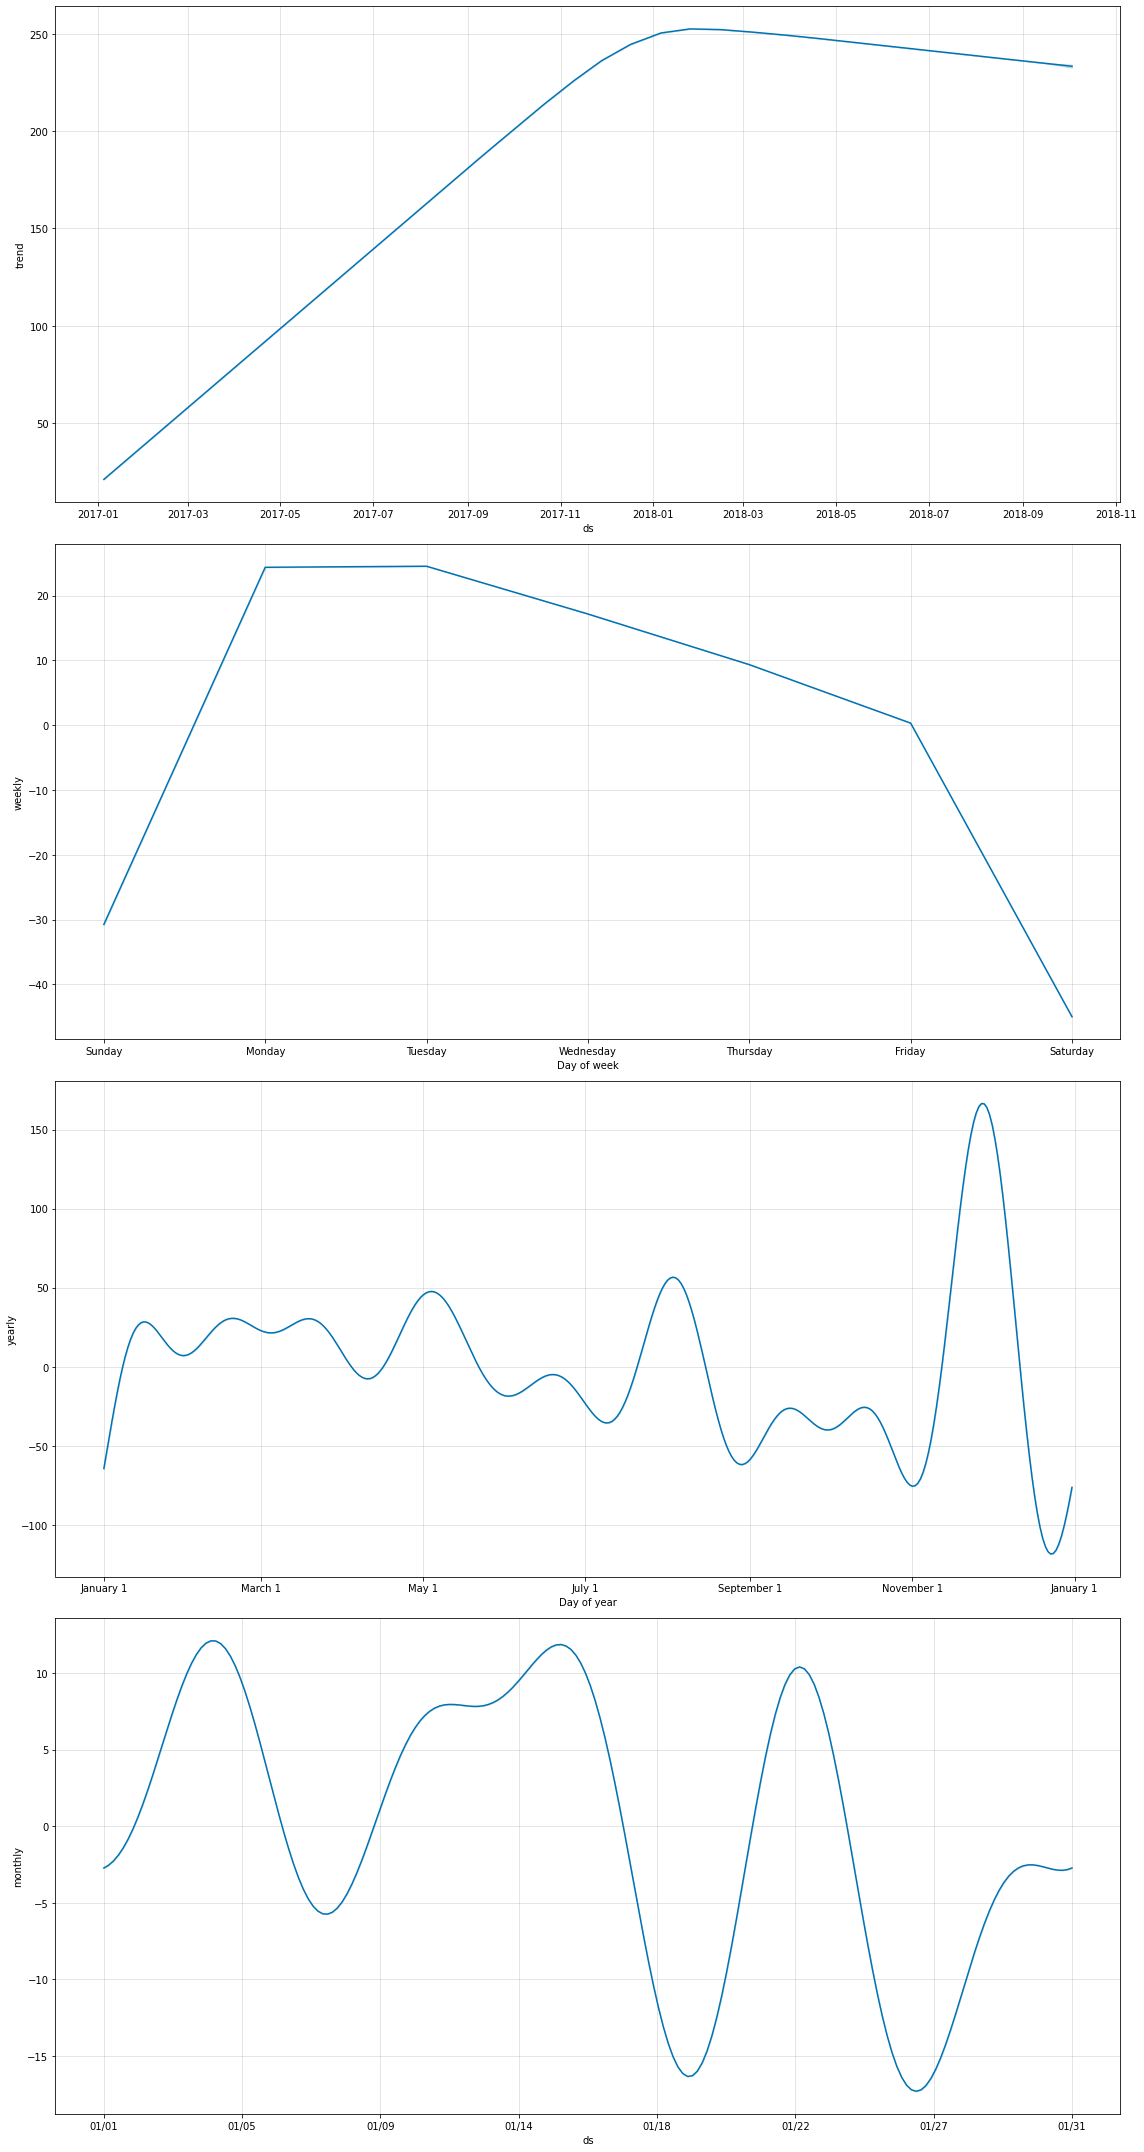

In [30]:
# Plotando os gráficos de tendência
model_quant.plot_components(forecast_quant,figsize=(16,30));

2) Considerando o preço total das vendas

In [31]:
# Fazendo o treinamento
model_preco.fit(ts_preco)

# Criando um dataframe para dados futuros
future_preco = model_preco.make_future_dataframe(periods = 30, freq = 'D')

# Fazendo a previsão
forecast_preco = model_preco.predict(future_preco)
forecast_preco[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
603,2018-09-04,28652.081344,19624.658207,37594.706353
604,2018-09-05,29216.894198,20468.866352,38674.787811
605,2018-09-06,29151.575614,19665.988624,38281.084228
606,2018-09-07,28501.692504,19625.223560,36917.309400
607,2018-09-08,22635.967584,13126.529190,31879.369602
608,2018-09-09,23348.718829,14223.824607,32025.792110
609,2018-09-10,30761.557839,21835.223336,39739.573070
610,2018-09-11,31036.258059,21928.240678,40192.294408
611,2018-09-12,30857.491034,21710.196838,39953.466554
612,2018-09-13,29937.587212,21243.443249,39238.748545


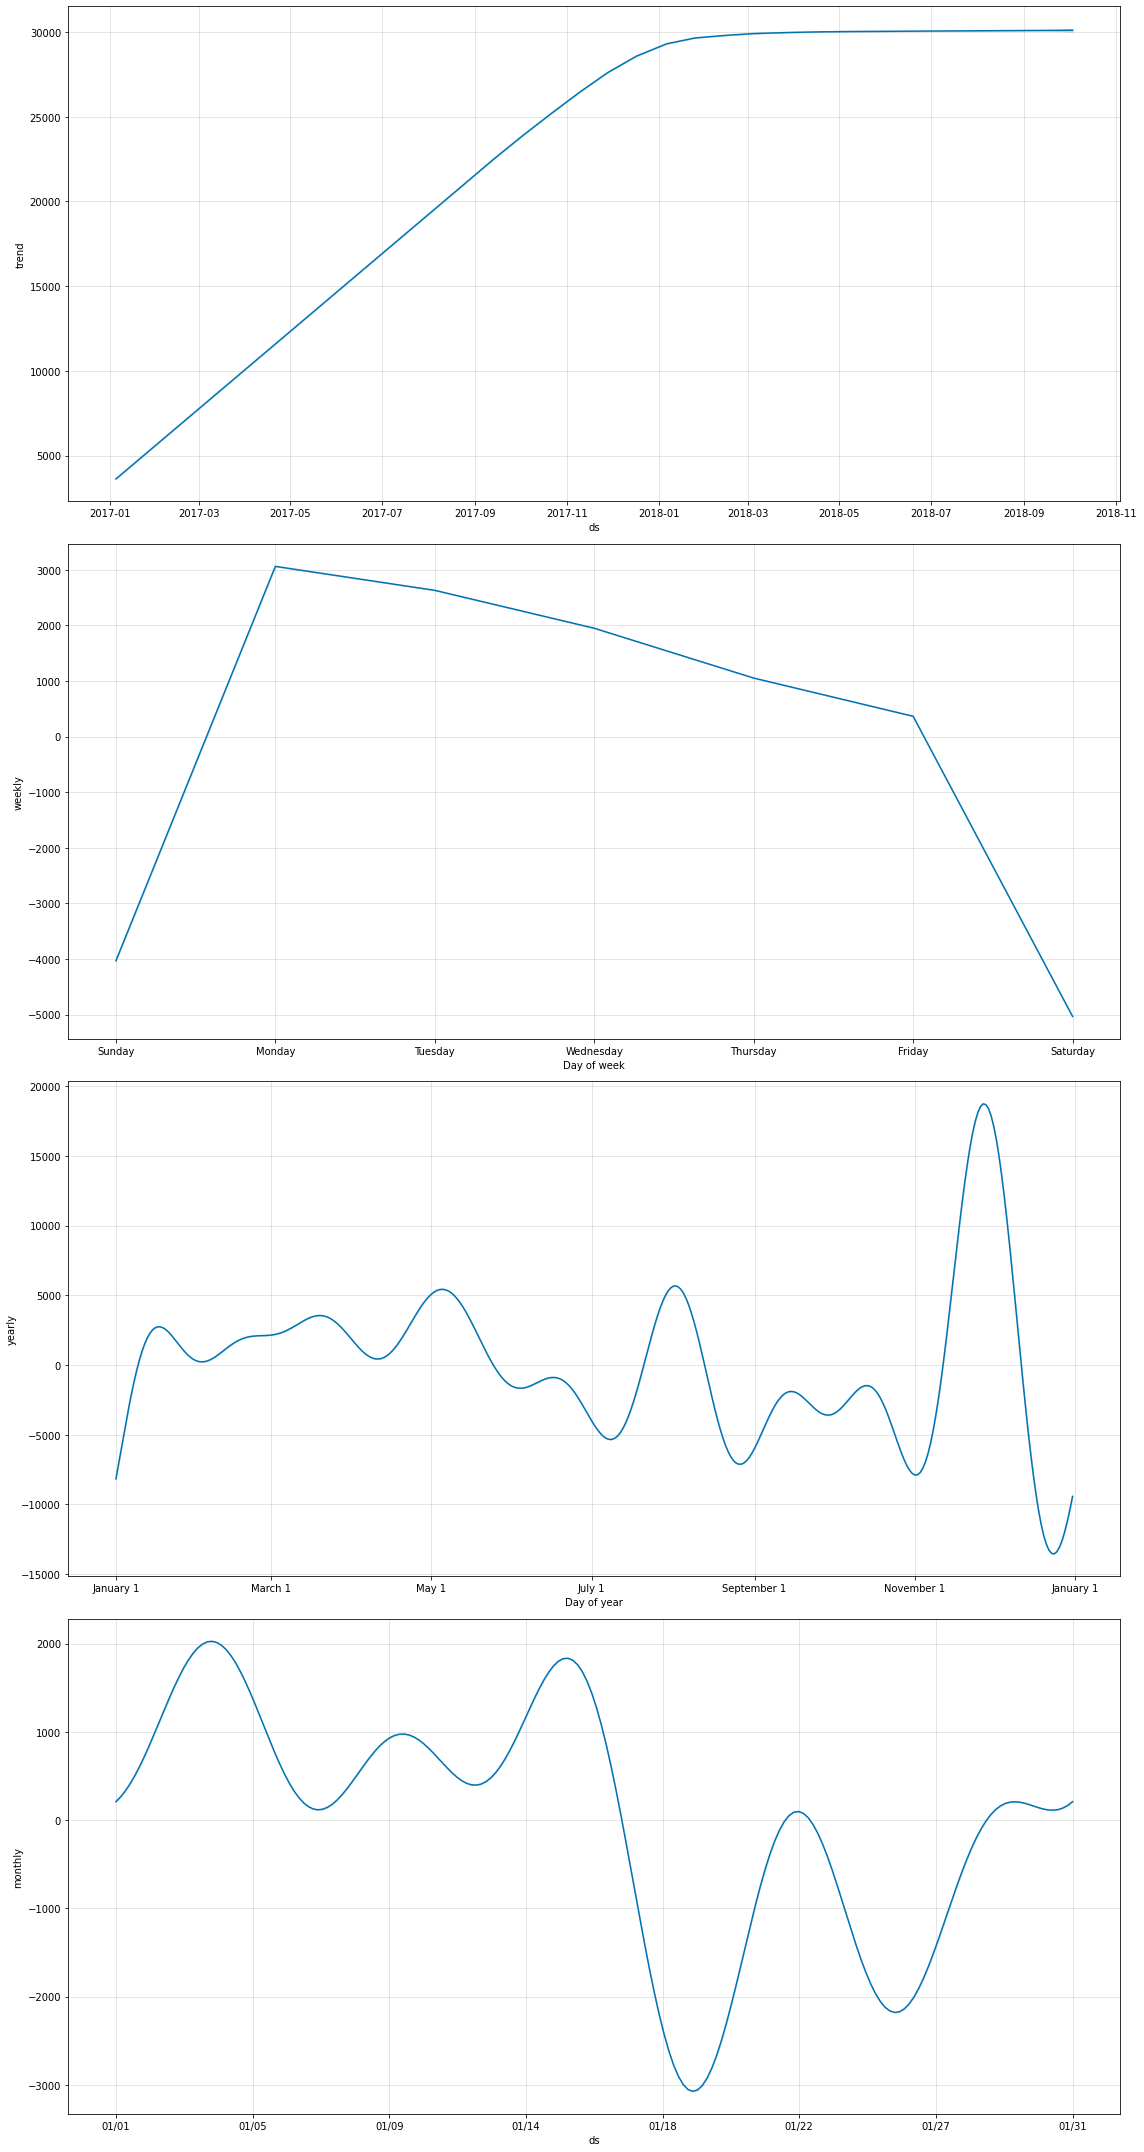

In [32]:
# Plotando os gráficos de tendência
model_preco.plot_components(forecast_preco,figsize=(16,30));

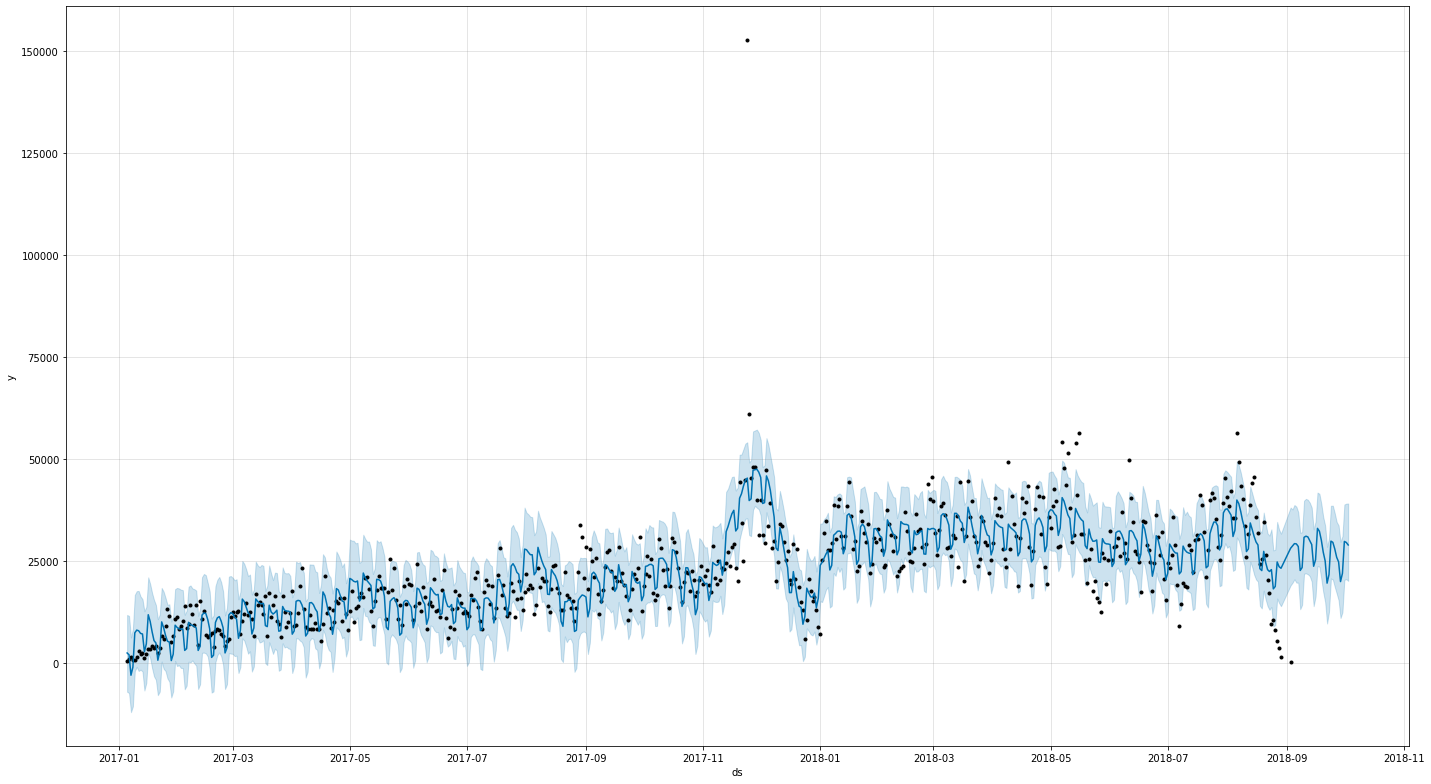

In [33]:
# Plotando o gráfico das previsões
model_preco.plot(forecast_preco,figsize=(20,11));

### <font color='red'>>>Interpretação do Forecast</font>

Ao visualizar o gráfico acima notamos a presença de um ponto que se destaca, apresentando-se com o valor superior a 150 mil reais, podendo assim ser considerado um outlier. Podemos então investigá-lo para tirar algum *insight* sobre este dado.

In [34]:
# Identificando o outlier
ts_preco.query('y> 150000')

,ds,y
323,2017-11-24,152653.74


O outlier detectado acima aconteceu no dia 27 de novembro de 2017. Ao fazer uma rápida pesquisa na internet descobrimos que esta foi uma data onde ocorreu a **Black Friday** e portanto faz sentido termos uma grande quantidade de compras, seguida de uma grande receita sendo gerada pelo comércio.

Afim de gerar um modelo de forecast com a maior precisão possível, iremos agora desconsiderar este outlier uma vez que, por mais que tenha grandes chances de ser um dado correto, ele poderá afetar o modelo de previsão, reduzindo a sua acurácia. Este trabalho de tratamento do outlier será feito a seguir. 

### <font color='red'>>>6) Tratando os outliers</font>

Para tratamento dos outliers iremos utilizar uma biblioteca específica chamada Isolation Forest cuja documentação pode ser conferida [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

Para melhor funcionamento do algorítimo iremos escalonar os dados e a seguir descobrir os índices dos registros que ele considerará uma anomalia.

In [35]:
# Importando as bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [36]:
# Criando o Scaler
scaler = StandardScaler()

In [37]:
# Criando um dataframe escalonado
scaled_data = ts_preco.copy()
scaled_data.head()

,ds,y
0,2017-01-05,396.90
1,2017-01-06,916.38
2,2017-01-07,1351.90
3,2017-01-08,709.58
4,2017-01-09,673.79


In [38]:
#  Escalonando os dados
scaled_data['scaled'] = scaler.fit_transform(pd.DataFrame(scaled_data['y']))
scaled_data.head()

,ds,y,scaled
0,2017-01-05,396.90,-1.776951
1,2017-01-06,916.38,-1.735108
2,2017-01-07,1351.90,-1.700027
3,2017-01-08,709.58,-1.751765
4,2017-01-09,673.79,-1.754648


In [39]:
# Criação do modelo
model =  IsolationForest(contamination=0.03)
model.fit(scaled_data[['y', 'scaled']]) 
scaled_data['anomaly'] = pd.Series(model.predict(scaled_data[['y', 'scaled']]))

In [40]:
# Verificando o resultado
scaled_data.head()

,ds,y,scaled,anomaly
0,2017-01-05,396.90,-1.776951,-1
1,2017-01-06,916.38,-1.735108,-1
2,2017-01-07,1351.90,-1.700027,-1
3,2017-01-08,709.58,-1.751765,-1
4,2017-01-09,673.79,-1.754648,-1


Como visto acima, criamos uma nova coluna chamada "anomaly" que apresenta valores 1 (não é outlier) e -1 (não é outlier). Portanto, podemos fazer uma contagem desses valores abaixo.

In [41]:
# Contando o número de anomalias
scaled_data['anomaly'].value_counts()

 1    584
-1     19
Name: anomaly, dtype: int64

Assim, o Isolation Forest considerou 19 registros como outlier.

In [42]:
# Encontrando os índices dos outliers
outliers_index = scaled_data.query('anomaly == "-1"').index
outliers_index

Int64Index([0, 1, 2, 3, 4, 5, 9, 323, 324, 459, 487, 490, 494, 496, 522, 578,
            579, 601, 602],
           dtype='int64')

In [43]:
# Deletando os outliers
ts_preco_sem_outlier = ts_preco.drop(index=outliers_index)

In [44]:
# Verificando o shape do novo dataframe
ts_preco_sem_outlier.shape

(584, 2)

In [45]:
# Criação do modelo sem outlier
model_preco_sem_outlier = Prophet(yearly_seasonality=True)

# Adicionando sazonalidade mensal
model_preco_sem_outlier.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fazendo o treinamento
model_preco_sem_outlier.fit(ts_preco_sem_outlier)

# Criando um dataframe para dados futuros
future_preco_sem_outlier = model_preco_sem_outlier.make_future_dataframe(periods = 30, freq = 'D')

# Fazendo a previsão
forecast_preco_sem_outlier = model_preco_sem_outlier.predict(future_preco_sem_outlier)
forecast_preco_sem_outlier[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
584,2018-08-29,27524.665331,21407.461380,33819.894374
585,2018-08-30,27721.114706,21285.980963,34568.913897
586,2018-08-31,26581.544856,19728.780508,33161.484641
587,2018-09-01,22548.538178,16325.485769,29184.758393
588,2018-09-02,24356.269259,18177.833754,30622.417465
589,2018-09-03,31724.245857,25046.610436,38143.869761
590,2018-09-04,32871.739781,26654.068604,39547.782327
591,2018-09-05,32967.752837,26822.941314,38944.242249
592,2018-09-06,31871.456004,25625.430191,38132.412387
593,2018-09-07,29452.354032,23384.567339,35559.234220


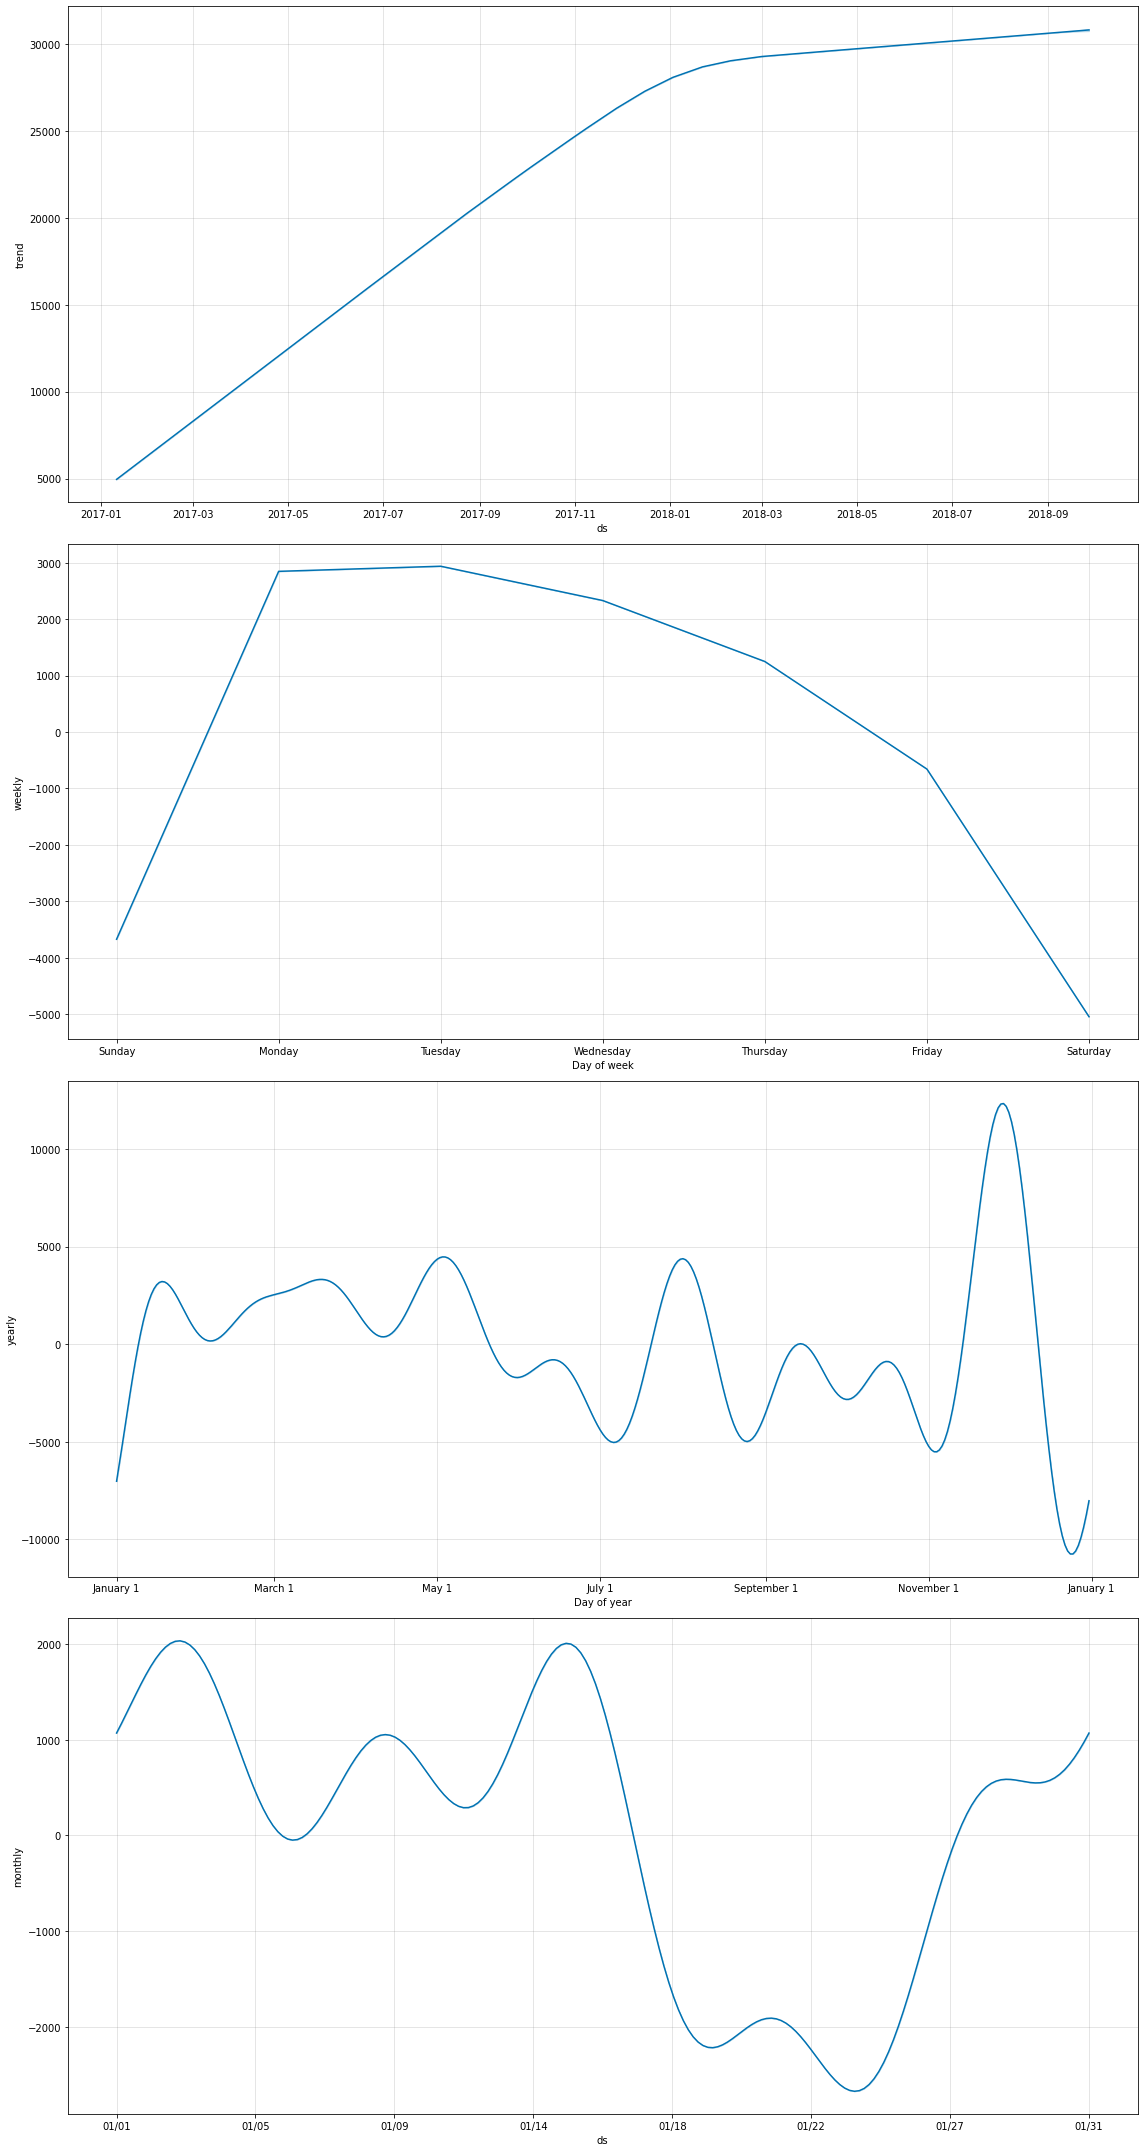

In [46]:
# Plotando os gráficos de tendência
model_preco_sem_outlier.plot_components(forecast_preco_sem_outlier,figsize=(16,30));

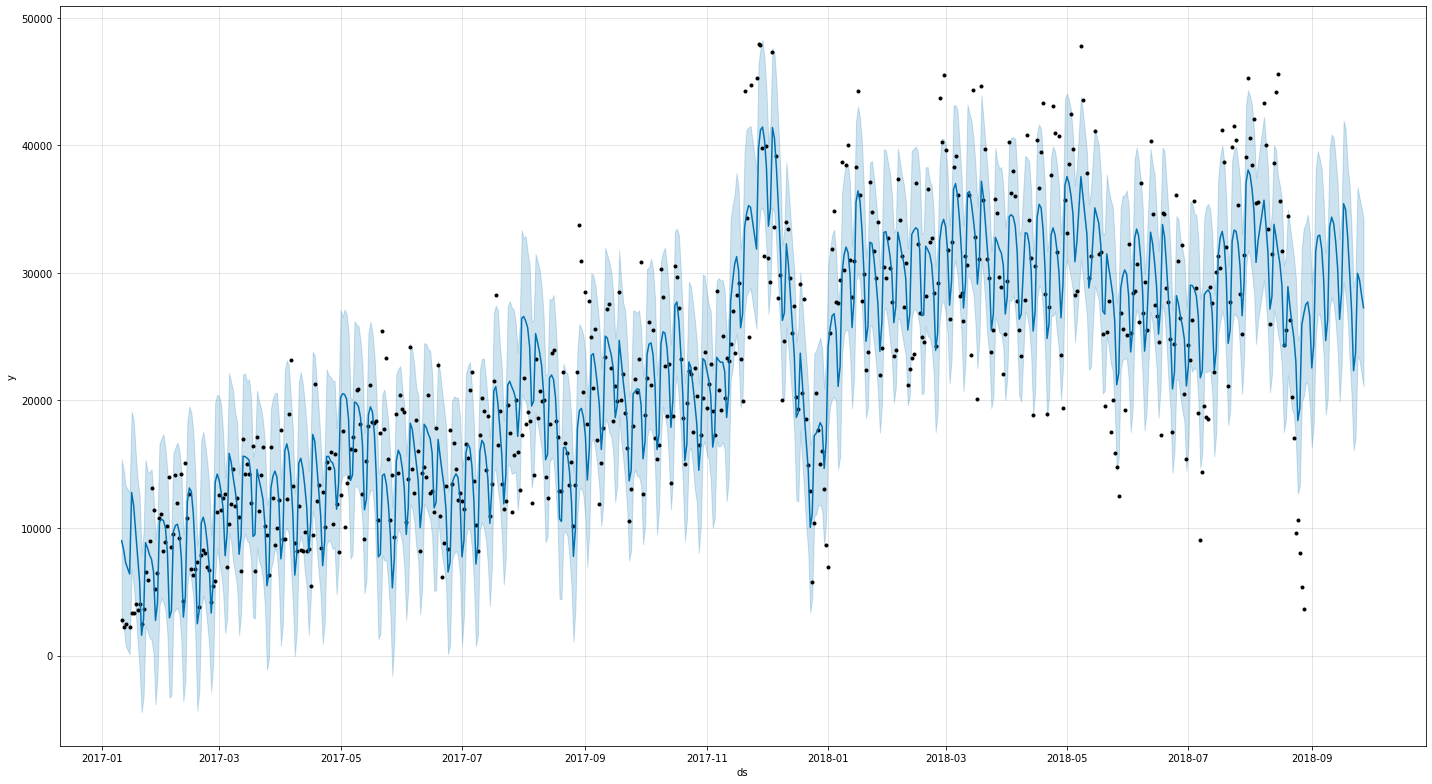

In [47]:
# Plotando o gráfico das previsões
model_preco_sem_outlier.plot(forecast_preco_sem_outlier,figsize=(20,11));

Do último plot podemos ver que os ultimos registros se mostram muito discrepantes com relação aos outros pontos, podendo assim adicionar um viés indesejado ao modelo. Assim, iremos removê-los manualmente para tentar gerar um modelo mais preciso possível.

Estes registros são facilmente localizados uma vez que, graficamente, podemos vê-los como sendo os registros dos últimos 4 dias.

In [48]:
ts_preco_sem_outlier.tail(5)

,ds,y
596,2018-08-24,9633.61
597,2018-08-25,10599.41
598,2018-08-26,8070.71
599,2018-08-27,5345.91
600,2018-08-28,3673.91


In [49]:
outliers_index_last = ts_preco_sem_outlier.tail(4).index
outliers_index_last

Int64Index([597, 598, 599, 600], dtype='int64')

Iremos, novamete, repetir o processo feito acima.

In [50]:
# Deletando os outliers
ts_preco_sem_outlier.drop(index=outliers_index_last, inplace=True)

In [51]:
# Verificando o shape do novo dataframe
ts_preco_sem_outlier.shape

(580, 2)

In [52]:
# Criação do modelo sem outlier
model_preco_sem_outlier = Prophet(yearly_seasonality=True)

# Adicionando sazonalidade mensal
model_preco_sem_outlier.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fazendo o treinamento
model_preco_sem_outlier.fit(ts_preco_sem_outlier)

# Criando um dataframe para dados futuros
future_preco_sem_outlier = model_preco_sem_outlier.make_future_dataframe(periods = 30, freq = 'D')

# Fazendo a previsão
forecast_preco_sem_outlier = model_preco_sem_outlier.predict(future_preco_sem_outlier)
forecast_preco_sem_outlier[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
580,2018-08-25,22880.382327,16619.191507,28869.731896
581,2018-08-26,24477.822038,18442.043848,31013.381420
582,2018-08-27,31460.076033,25812.554545,37586.975806
583,2018-08-28,32270.741939,25878.991931,37727.983201
584,2018-08-29,32370.505892,26443.390343,38449.956164
585,2018-08-30,32202.395676,26028.995991,38070.274804
586,2018-08-31,30877.471860,24536.663526,36762.382355
587,2018-09-01,27004.336875,21143.424434,33138.774589
588,2018-09-02,28913.841064,22899.873994,35284.956708
589,2018-09-03,36394.262045,30653.488863,42071.906621


Por fim, podemos plotar os respectivos gráficos.

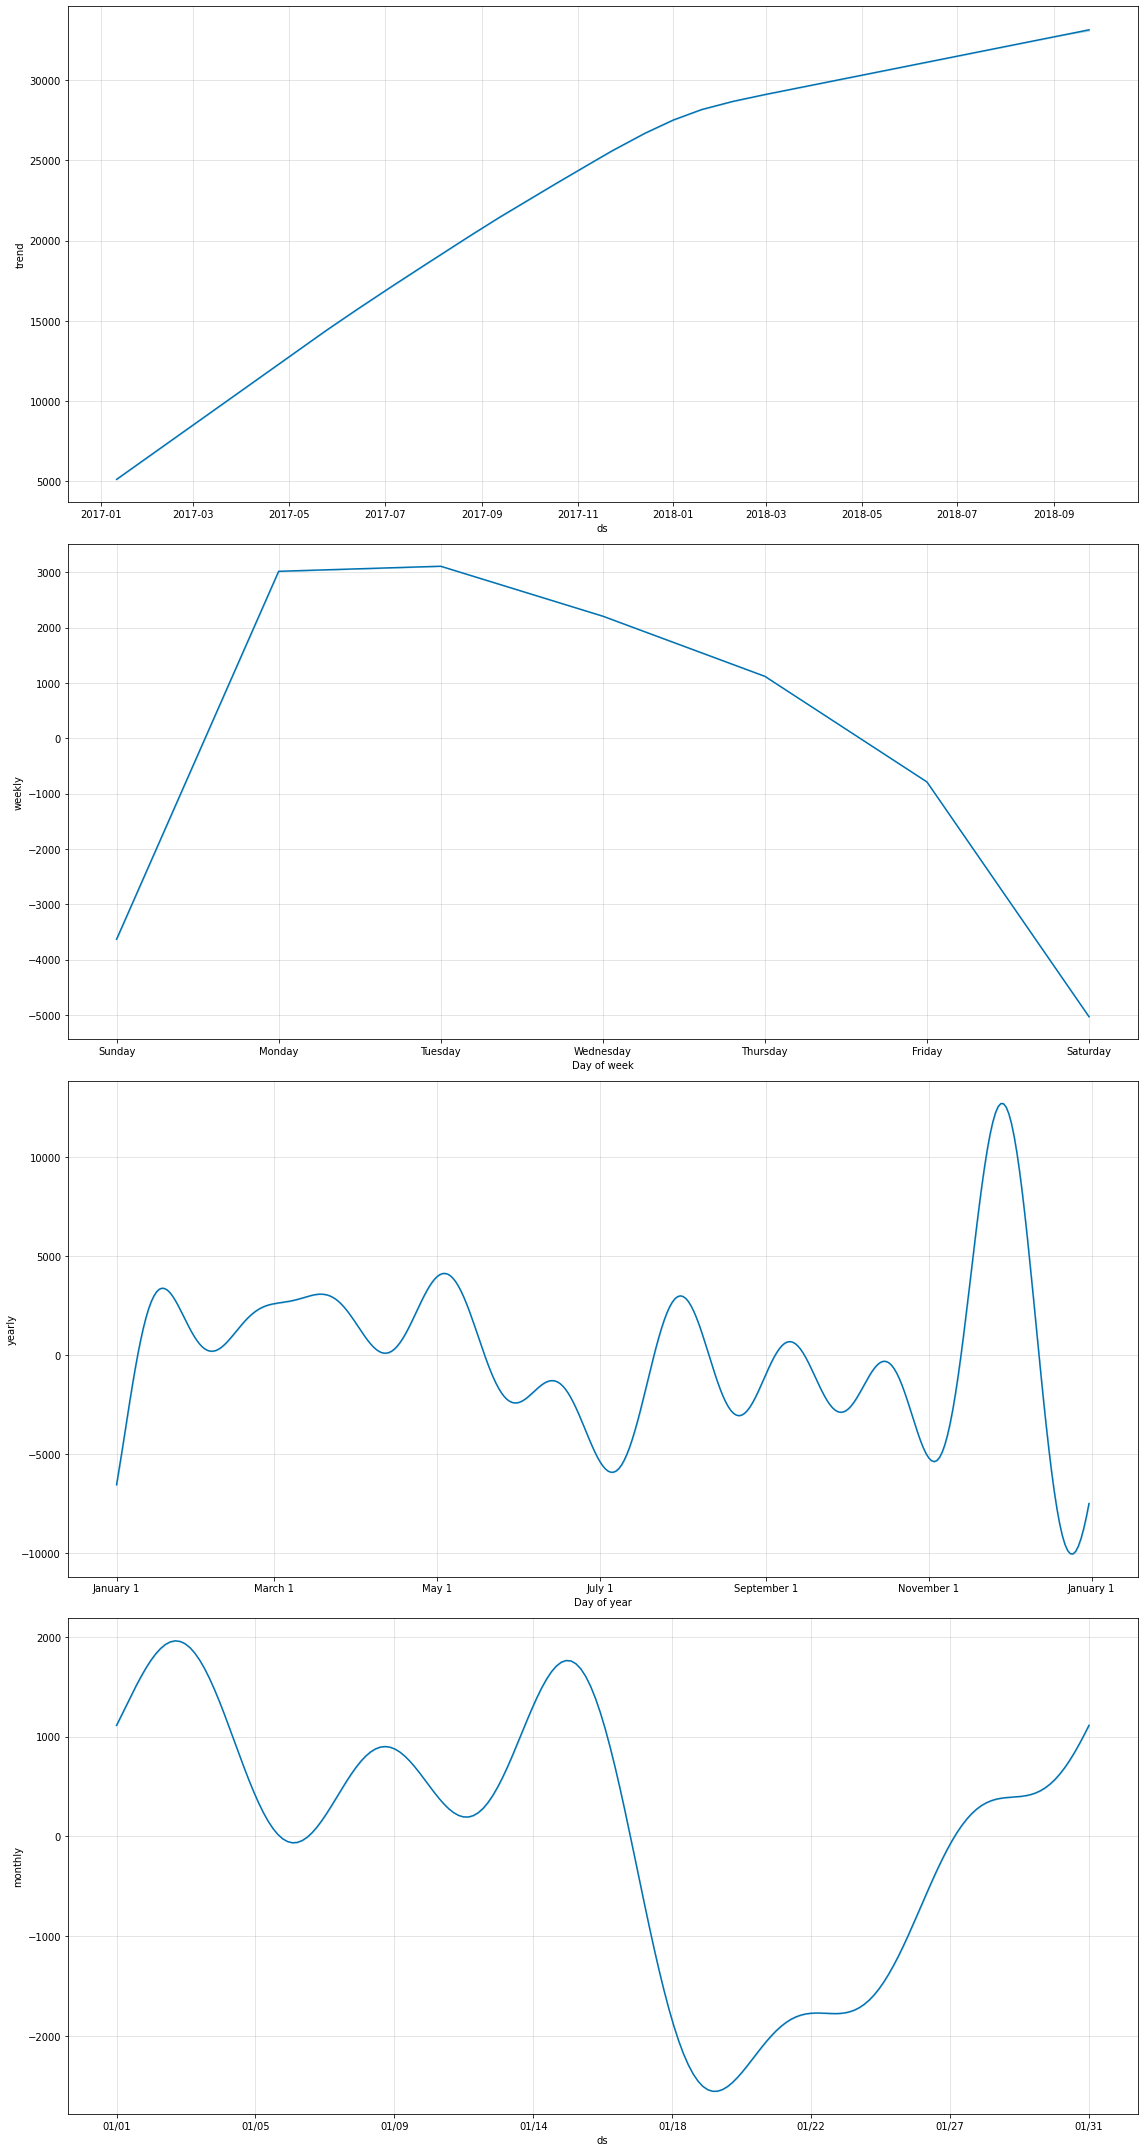

In [53]:
# Plotando os gráficos de tendência
model_preco_sem_outlier.plot_components(forecast_preco_sem_outlier,figsize=(16,30));

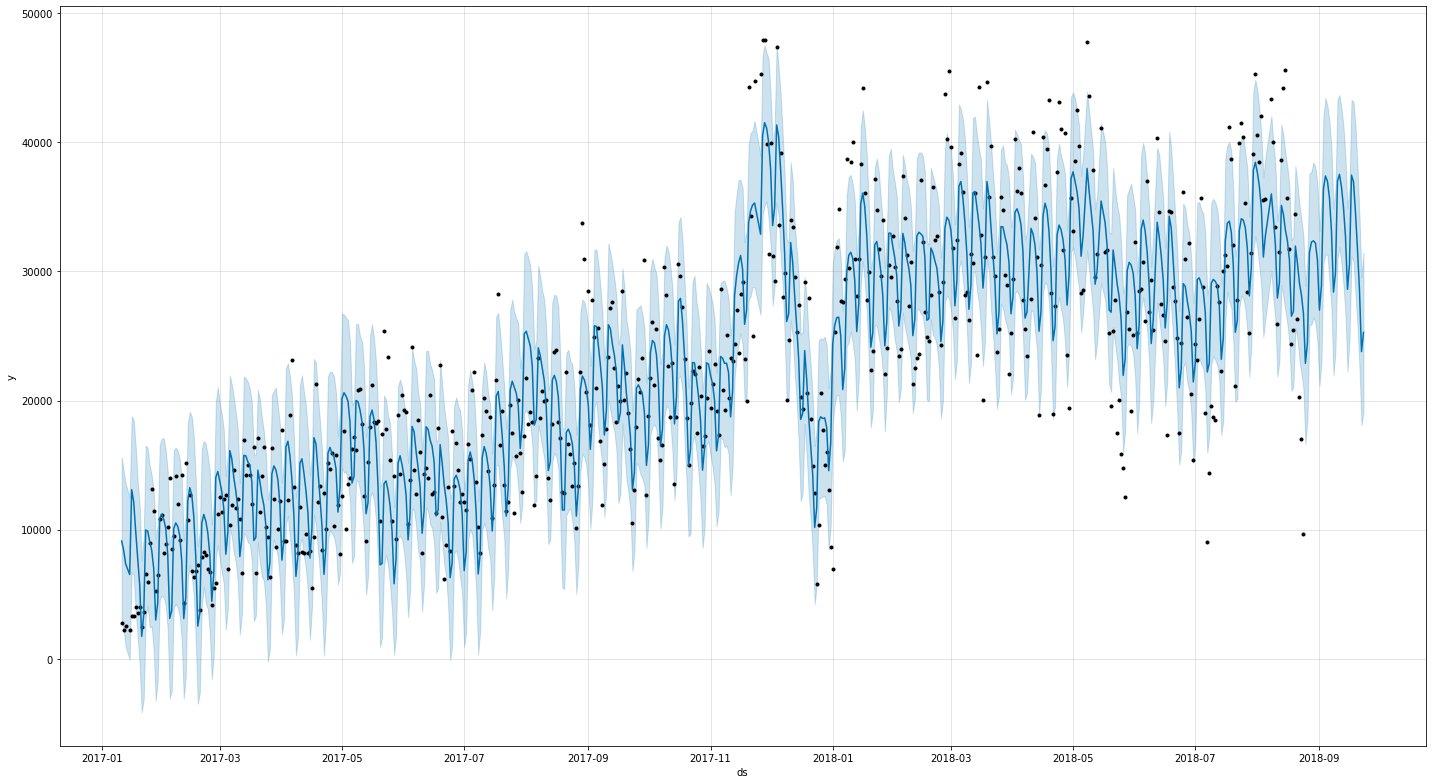

In [54]:
# Plotando o gráfico das previsões
model_preco_sem_outlier.plot(forecast_preco_sem_outlier,figsize=(20,11));

### <font color='red'>>>**7) Conclusão**</font>
- Quantidades

A partir dos gráficos acima vemos que há uma clara tendência de crescimento das vendas dos produtos até janeiro de 2018, apresentando uma ligeira queda no período subsequente até novembro. Além disso verificamos que os dias da semana com maior quantidade de compras é na segunda e na terça-feira. É possível ver ainda que os fins de semana são os dias com menor vendas registradas.

Com relação ao ano vemos que o mês de dezembro é o mês com maior venda. É importante dizer que este resultado vem acompanhado de um crescimento das vendas em novembro, culminando com o ápide no último mês do ano.

Mensalmente notamos que há bastante oscilação nas vendas mas que a primeira quinzena é onde obtém-se os melhores resultados, tendo dois picos registrados até o dia 5 e por volta do dia 15. Após este dia vemos uma queda brusca seguida de um crescimento por volta do dia 22, que é o maior resultado deste fim de mês.

- Valor em dinheiro

Com relação à interpretação dos valores vemos que a tendência é muito similar ao das quantidades, mostrando que há uma relação entre as quantidades compradas e o valor gerado por tais transações. Entretanto, ainda é possível notar que o resultado é muito sensível aos outliers e que estes trazem um impacto considerável ao modelo e sua análise.

Notamos que ao remover estas anomalias (último modelo criado) vemos que há uma tendência de crescimento acelerado nas receitas até meados de janeiro de 2018, tendo a seguir um crescimento menos acentuado.

Durante a semana os principais dias para gerar receita continuam sendo na segunda e terça-feira, tendo uma queda nos seguintes dias culminando em um decepcionante resultado no fim de semana.

Anualmente continuamos tendo um grande pico de vendas no final de novembro e início de dezembro. Podemos inferir que a influência da **black friday** somado ao começo de dezembro, mês do Natal, causam um interesse maior na realização de compras, sejam para adquirir produtos em promoção ou simplesmente antecipar as compras de fim de ano.

No quesito mensal, ainda temos uma tendência maior de compras na primeira quinzena, talvez impulsionada pelo fato do salário dos consumidores sairem na primeira semana do mês. A partir da segunda quinzena vemos uma tendência de queda, provavelmente causada pela redução do poder aquisitivo após pagamentos de contas, despezas, etc. É importante notar também que apesar deste cenário, há uma tendência de crescimento nos últimos dias do mês. Podemos especular que há uma certa "empolgação" com o fato de o próximo salário estar prestes a sair ou uma coincidência com a melhor data de compra do cartão de crédito.

- Forecasting

As previsões feitas pelo modelo para os dados que já haviamos registrado encontra-se bem fiel com exceção de alguns pontos específicos, o que nos leva a crer que este modelo conseguiu se sair bem, sobretudo ao se considerar a margem de erro, que em geral englobou a maior parte dos pontos.

Assim, podemos considerar que é um modelo confiável para previsão das vendas nos próximos 30 dias, que foi o que fizemos. Obviamente, para prever dados de um futuro mais distante esta confiabilidade vai se perdendo uma vez que os erros em cada previsão vão se acumulando, gerando uma grande incerteza quanto mais longe tentamos prever os valores.

### <font color='red'>>>**7) Final**</font>